In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [4]:
mp = pd.read_csv('~/Desktop/To_prediction/Metaphlan3_pheno_out.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,k__Bacteria,p__Firmicutes,p__Bacteroidetes,p__Actinobacteria,p__Proteobacteria,c__Negativicutes,c__Actinobacteria,c__Bacilli,c__Gammaproteobacteria,c__Coriobacteriia,...,s__Dysgonomonas_mossii,s__Lactobacillus_oris,s__Anaerostipes_sp_992a,s__Prevotella_amnii,s__Clostridium_sp_CAG_413,s__Bacteroides_pectinophilus,s__Bacteroides_sp_CAG_661,s__Bacteroides_sp_CAG_598,s__Lachnoclostridium_sp_An298,Diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,100.00000,67.61532,31.66794,0.36386,0.35288,2.98834,0.29015,0.14747,0.13561,0.07371,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM79HOL,100.00000,28.91057,70.64680,0.34668,0.09595,2.86351,0.28805,0.14747,0.13561,0.05863,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM67U9D,100.00000,47.11364,52.38839,0.42247,0.07550,2.56107,0.23156,0.14747,0.03417,0.19091,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
MSM6J2MF,100.00000,96.01353,0.22109,0.20955,3.55583,10.64325,0.15724,0.47343,3.55583,0.05230,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
HSM7J4N4,100.00000,17.14361,80.79733,0.05757,2.00149,0.80214,0.15724,0.47343,1.38644,0.05757,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSMA26BL,100.00000,27.79505,71.62210,0.29711,0.28574,1.62632,0.27860,0.04210,0.25020,0.01850,...,0.11053,0.00381,0.34556,0.027,0.14151,0.03613,0.00493,0.00196,0.01555,Control
MSM79H9A,99.66905,28.47878,65.11674,0.86353,0.23498,0.27598,0.76428,0.04392,0.07296,0.09925,...,0.11053,0.00381,0.34556,0.027,0.14151,0.03613,0.00493,0.00196,0.01555,Control
HSM7J4KK,100.00000,19.76531,76.59708,1.49518,0.91694,0.89954,1.06601,0.01202,0.65780,0.42918,...,0.11053,0.00381,0.34556,0.027,0.14151,0.03613,0.00493,0.00196,0.01555,Control


In [5]:
select_sampels = pd.read_csv('~/Desktop/selected_samples.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)
select_sampels

,fecalcal_max,Diagnosis
External ID,,
CSM67UA2,37.17836,CD
CSM5MCVN,16.32450,CD
CSM67UBZ,14.30000,UC
CSM5MCXL,70.91411,UC
CSM5MCY8,232.60620,UC
...,...,...
PSM7J19N,16.78459,nonIBD
PSM6XBW3,79.82248,nonIBD
PSM7J12J,289.22620,CD


In [10]:
mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
mp

,s__Eubacterium_rectale,s__Bacteroides_vulgatus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_uniformis,s__Ruminococcus_bromii,s__Roseburia_intestinalis,s__Bacteroides_xylanisolvens,s__Eubacterium_sp_CAG_38,...,s__Dysgonomonas_mossii,s__Lactobacillus_oris,s__Anaerostipes_sp_992a,s__Prevotella_amnii,s__Clostridium_sp_CAG_413,s__Bacteroides_pectinophilus,s__Bacteroides_sp_CAG_661,s__Bacteroides_sp_CAG_598,s__Lachnoclostridium_sp_An298,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,1.60280,36.71092,2.08272,0.04617,1.35692,27.54215,0.09280,0.06951,10.33616,0.22458,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM5MCVN,1.40462,59.26093,0.04425,0.22007,1.65773,21.76774,0.36580,0.06669,3.50131,0.27288,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM67UBZ,0.19670,54.03134,4.19026,0.02277,9.26557,20.48908,1.21533,1.17502,0.31175,0.07447,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCXL,4.00191,28.84702,14.26485,1.05975,1.21332,17.05426,0.13059,12.08812,0.00460,1.60439,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCY8,0.88858,37.24257,0.04678,0.51389,1.98052,12.58333,0.30843,0.68305,3.88345,1.21840,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,1.76115,5.96316,0.02227,0.78443,5.45038,5.43963,0.33984,0.94363,1.69432,0.47594,...,0.32258,0.01943,0.34556,0.027,0.14151,1.05774,0.00493,0.00196,0.01555,nonIBD
PSM6XBW3,0.01044,7.59653,0.36539,0.09284,4.52676,1.40925,0.22098,0.39336,0.20741,0.14176,...,0.11053,0.01943,0.34556,0.027,0.14151,0.03613,0.00493,0.00196,0.01555,nonIBD
PSM7J12J,2.08201,31.18294,1.86483,0.29568,6.08941,9.68155,0.39770,0.84954,0.67501,0.84226,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,CD


In [15]:
MTX_X = mp.iloc[:,1:498]
MTX_y = select_sampels.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.40, random_state=42)

Best Model:
RandomForestClassifier(max_features=2, min_samples_split=5, n_estimators=50,
                       random_state=42)


<AxesSubplot:>

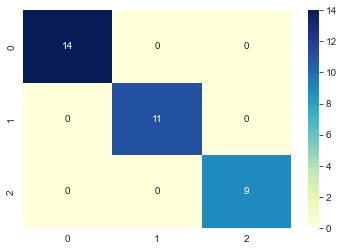

In [16]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=42)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
cm_RF = confusion_matrix(y_test, RF_predictions)
cm_RF
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Diagnosis', ylabel='row_0'>

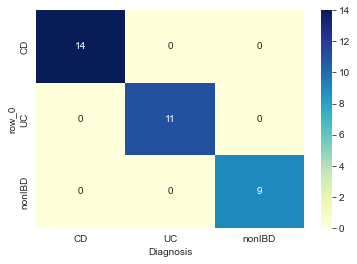

In [17]:
mod2 = RandomForestClassifier()

mod2.fit(X_train,y_train)

pred2 = mod2.predict(X_test)
cm_RF_ = pd.crosstab(pred2, y_test)

sns.heatmap(cm_RF_, cmap="YlGnBu", annot=True)

In [18]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, RF_predictions))

Accuracy 1.0
